In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 컬럼 설명
- clientnum : 고객 번호
- Attrition_flag : 고객으로 남아있는 경우와 떠난 고객 **Target**
- Cumtomer_age : 고객의 나이
- Gender : 고객의 성별
- Dependent_count : 부양 가족수
- Education_level : 교육 수준
- Marital_status : 결혼 여부 
- income_Category : 수입 수준
- card_category : 카드 유형(파랑, 실버, 골드, 플래티넘)
- Months_on_book : 은행과 거래 기간 월 기준
- Total_Relationship_Count : 한 고객이 소유한 카드의 개수
- Months_Inactive_12_mon : 12개월 내 비활성화된 횟수
- Contacts_Count_12_mon : 12개월 내 접촉된 횟수
- Credit_Limit : 카드 사용 금액 제한 정도
- Total_Revolving_Bal : 부채를 지고 결제 금액을 다음 달로 이월하는 정도
- Avg_Open_To_Buy : 신용을 통해 구매 가능한 금액 12개월 평균
- Total_Amt_Chng_Q4_Q1 : 거래 금액의 변도 1분기 대비 4분기
- Total_Trans_Amt : 총 거래금액 최근 12개월 이내
- Total_Trans_Ct : 총 거래 수 최근 12개월 이내
- Total_Ct_Chng_Q4_Q1 : 거래 수의 변환 1분기 대비 4분기
- Avg_Utilization_Ratio : 평균 카드 이용률

# 1일차, 컬럼 정리 및 데이터 파악

In [2]:
url = "https://raw.githubusercontent.com/DataResolvere/Project/main/first_project/BankChurners.csv"

In [3]:
df_row = pd.read_csv(url)
df_row

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df_row["target"] = df_row["Attrition_Flag"]
df_row = df_row.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", \
                              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",\
                              "Attrition_Flag"])
df_row

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Existing Customer
10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Attrited Customer
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,Attrited Customer
10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,Attrited Customer


In [5]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
make_en = LabelEncoder()
df_encorder = df_row.copy()

df_encorder["Gender"] = make_en.fit_transform(df_encorder["Gender"])
df_encorder["Education_Level"] = make_en.fit_transform(df_encorder["Education_Level"])
df_encorder["Marital_Status"] = make_en.fit_transform(df_encorder["Marital_Status"])
df_encorder["Income_Category"] = make_en.fit_transform(df_encorder["Income_Category"])
df_encorder["Card_Category"] = make_en.fit_transform(df_encorder["Card_Category"])
df_encorder["target"] = make_en.fit_transform(df_encorder["target"])

In [7]:
df_encorder["target"].value_counts()

1    8500
0    1627
Name: target, dtype: int64

In [8]:
df_encorder.corr()[["target"]].sort_values(by="target") # 총 거래 횟수가 많을수록 이탈하지 않을 확률이 높음

,target
Contacts_Count_12_mon,-0.204491
Months_Inactive_12_mon,-0.152449
Dependent_count,-0.018991
Marital_Status,-0.018597
Customer_Age,-0.018203
Income_Category,-0.017584
Months_on_book,-0.013687
Education_Level,-0.005551
Avg_Open_To_Buy,0.000285
Card_Category,0.006038


In [9]:
df_row.count()

CLIENTNUM                   10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
target                      10127
dtype: int64

In [10]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [11]:
str(df_row.dtypes[2]) == "object", str(df_row.columns[2])

(True, 'Gender')

In [12]:
column_list_Category = []
column_list_continuous = []

for num in range(len(df_row.columns)):
    if str(df_row.dtypes[num]) == "object":
        column_list_Category.append(str(df_row.columns[num]))
    else:
        column_list_continuous.append(str(df_row.columns[num]))

In [13]:
column_list_Category, column_list_continuous

(['Gender',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category',
  'target'],
 ['CLIENTNUM',
  'Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'])

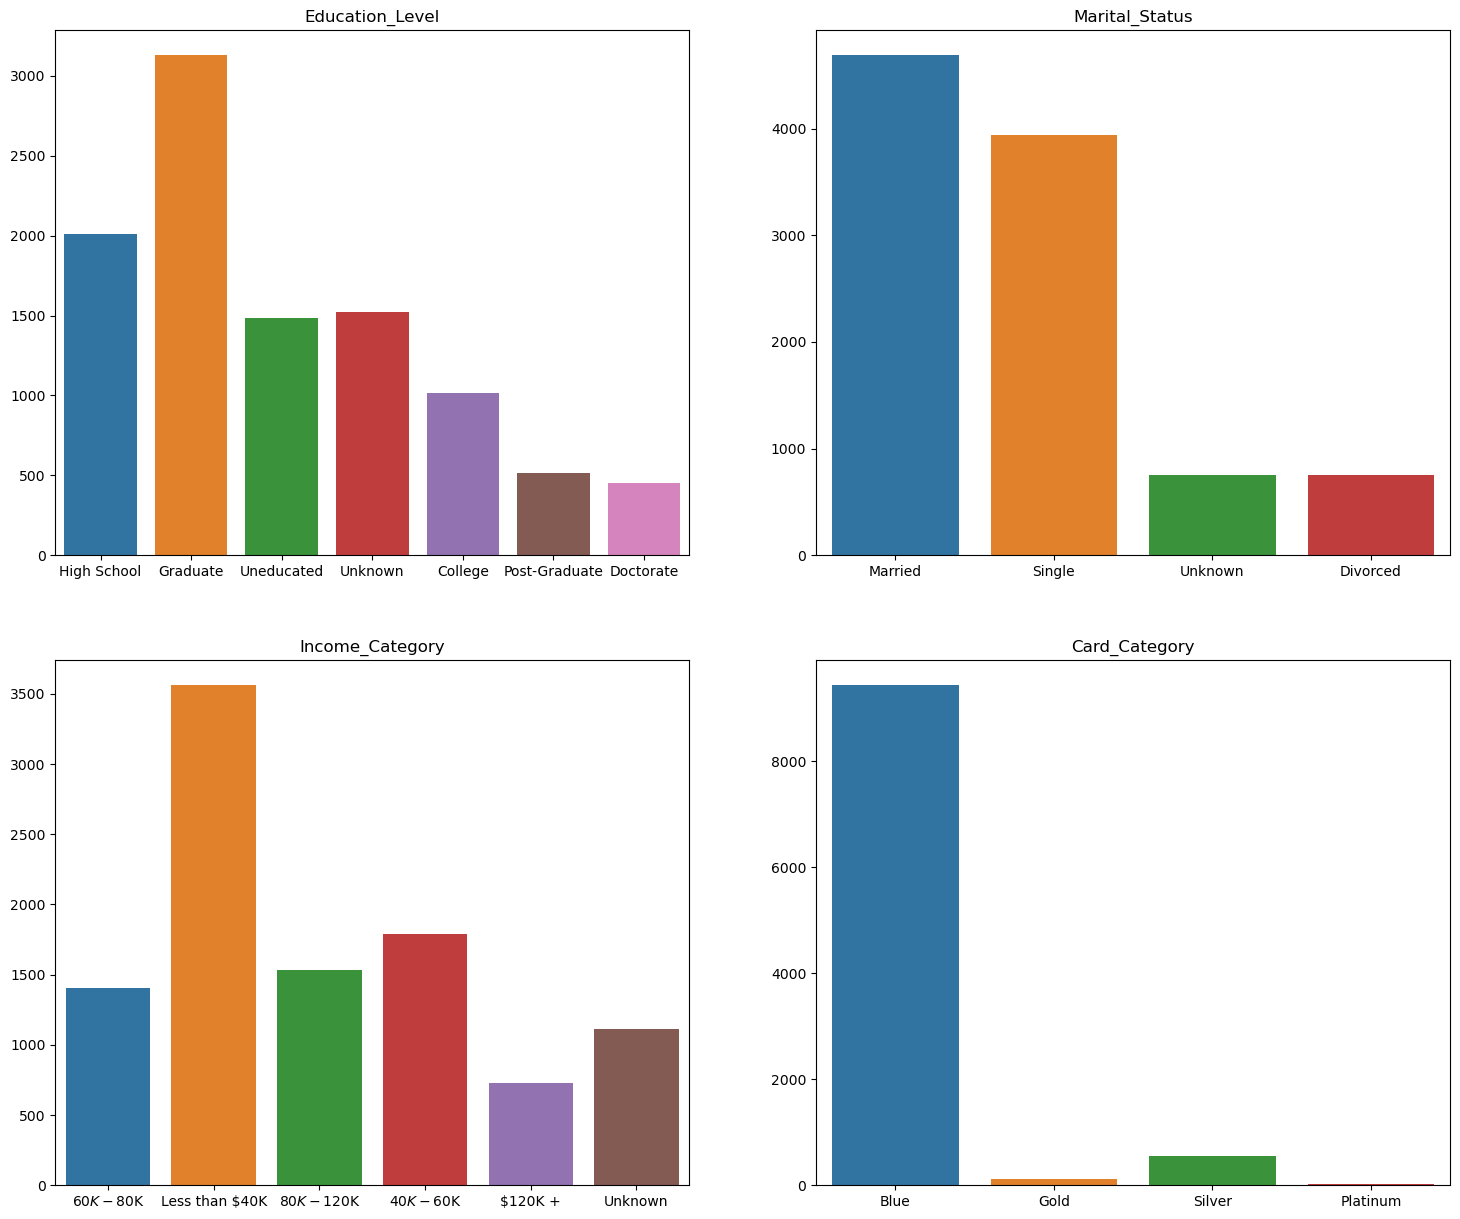

In [14]:
plt.figure(figsize=(18,15))

for num in range(0, 4):
    plt.subplot(2,2, (num+1) )
    sns.countplot(x=df_row[column_list_Category[num+1]], data = df_row);
    plt.xlabel("")
    plt.ylabel("")
    plt.title(column_list_Category[num+1])

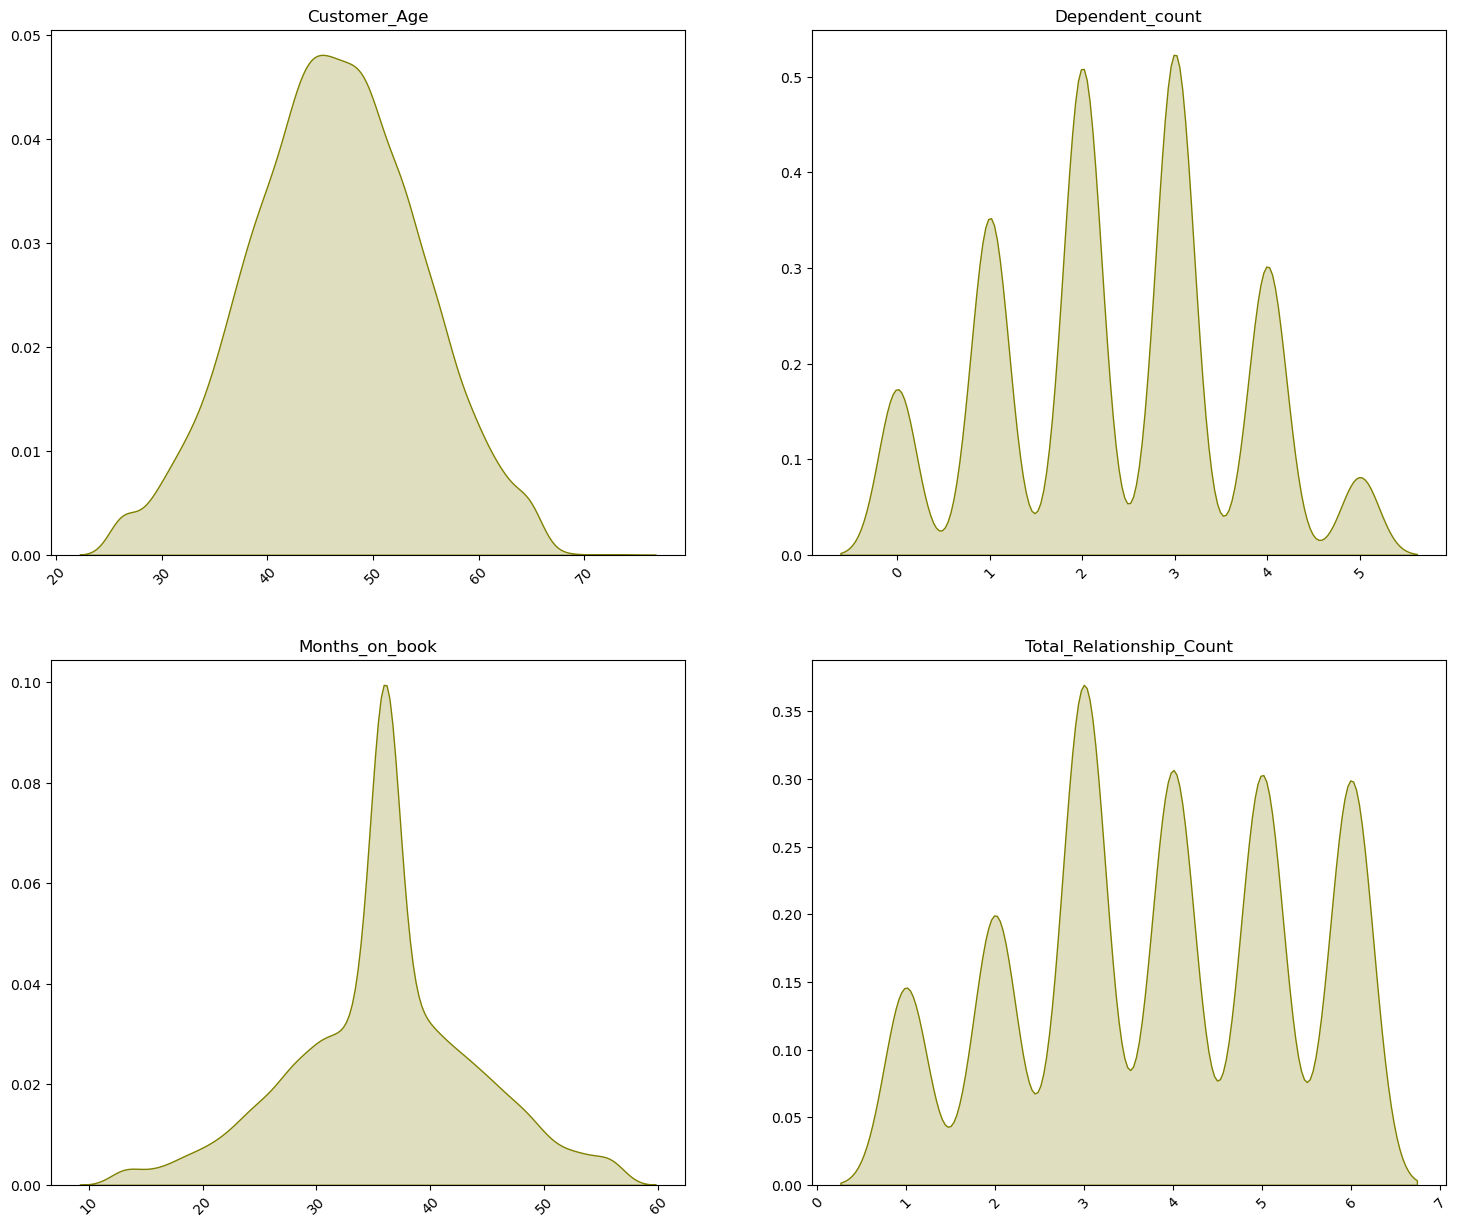

In [15]:
plt.figure(figsize=(18,15))

for num in range(0, 4):
    warnings.filterwarnings(action="ignore")
    plt.subplot(2,2, (num +1) )
    sns.kdeplot(df_row[column_list_continuous[num+1]], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_continuous[num+1])    

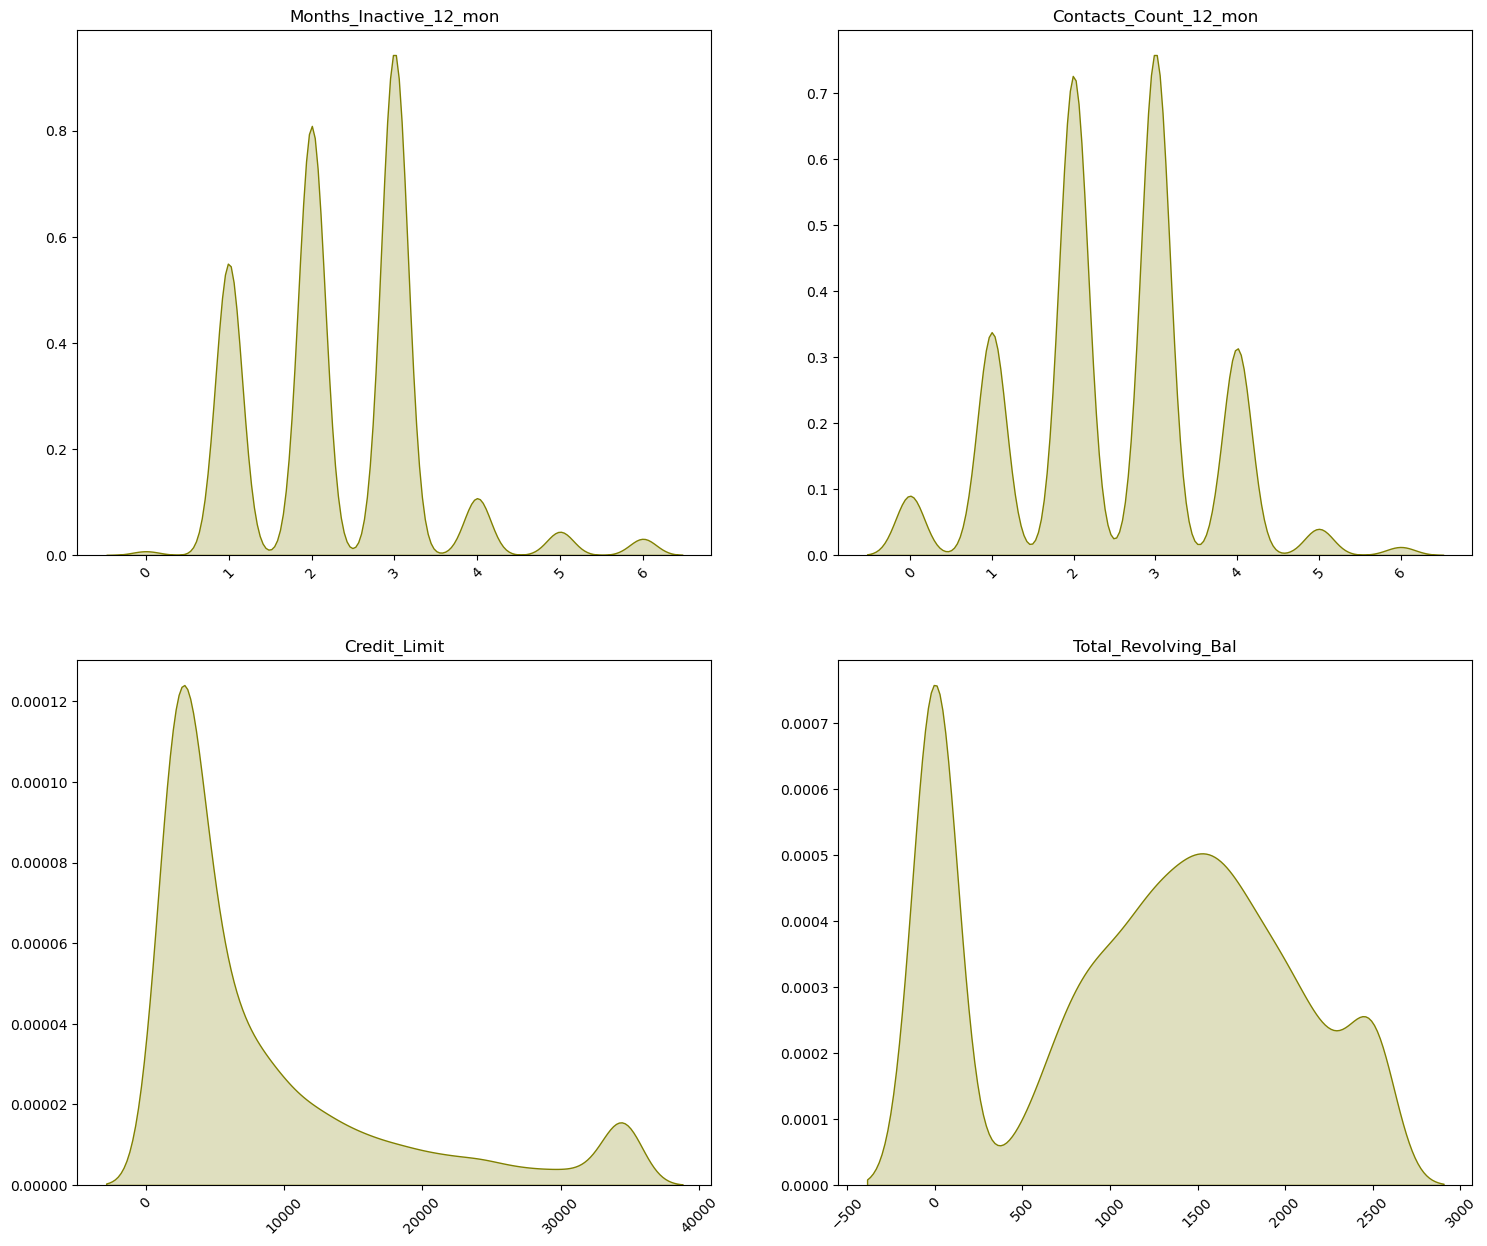

In [16]:
plt.figure(figsize=(18,15))

for num in range(4, 8):
    warnings.filterwarnings(action="ignore")
    plt.subplot(2,2, (num -3) )
    sns.kdeplot(df_row[column_list_continuous[num+1]], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_continuous[num+1])

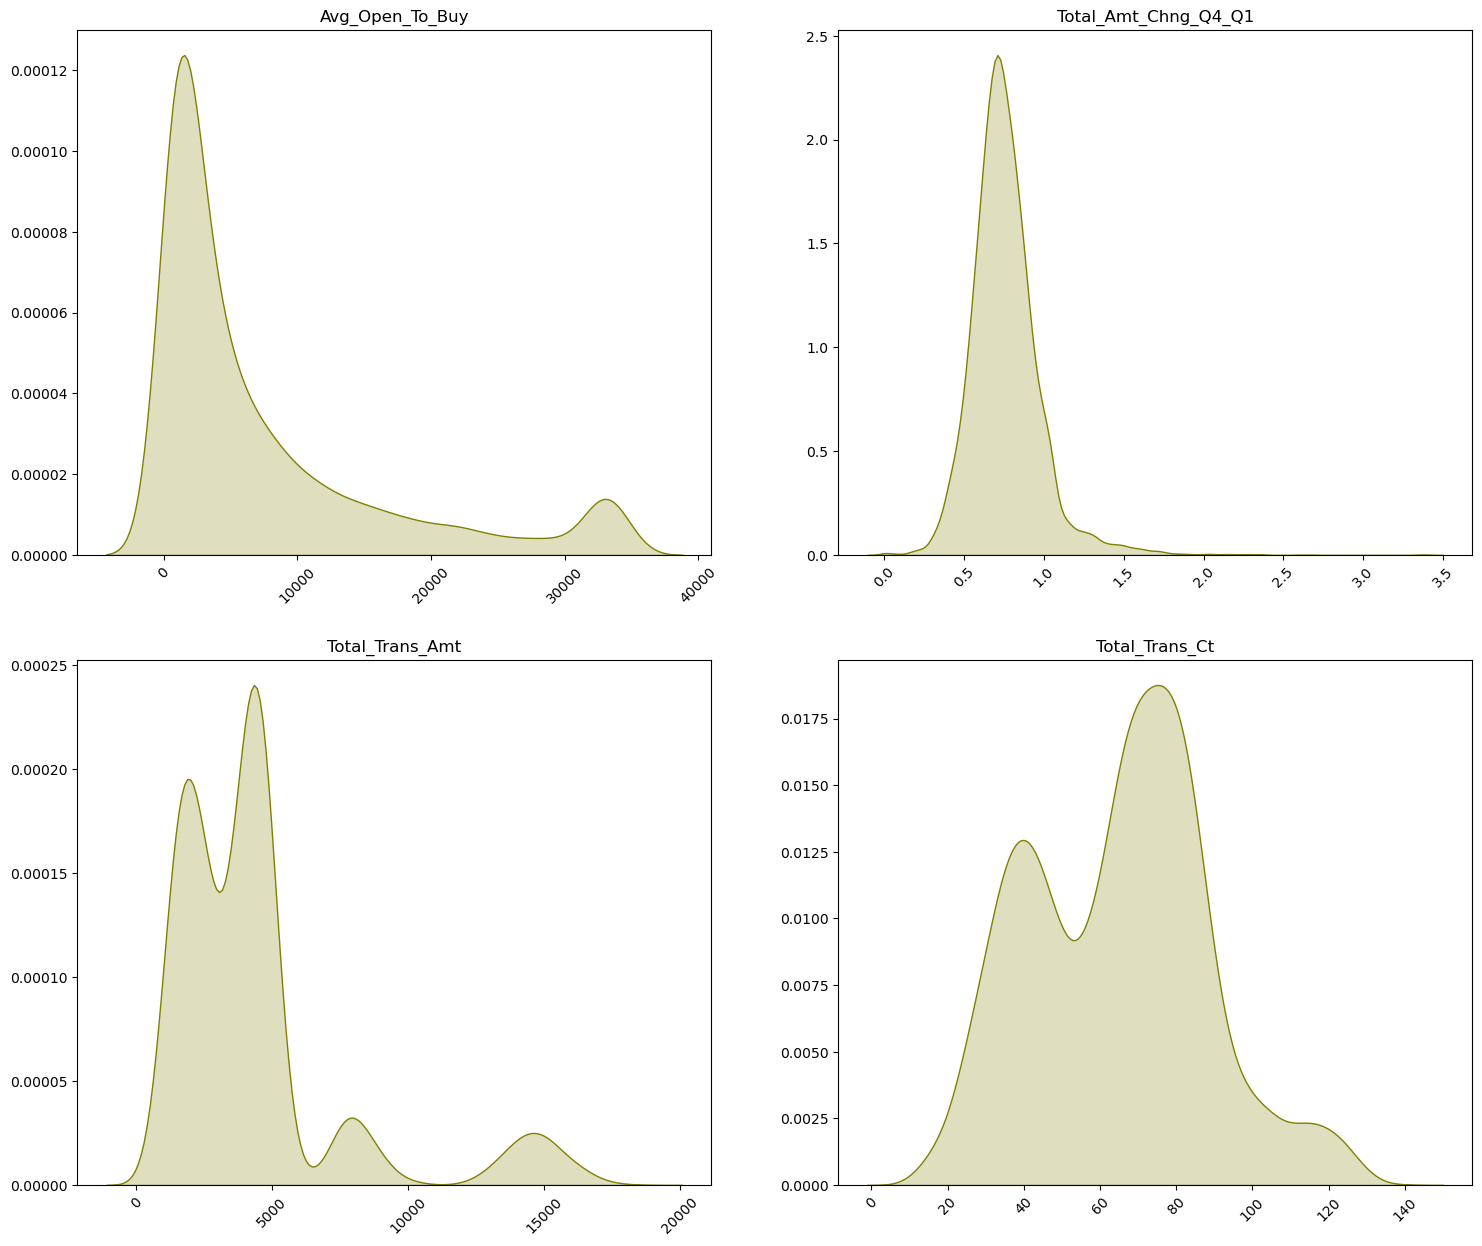

In [17]:
plt.figure(figsize=(18,15))

for num in range(8, 12):
    warnings.filterwarnings(action="ignore")
    plt.subplot(2,2, (num -7) )
    sns.kdeplot(df_row[column_list_continuous[num+1]], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_continuous[num+1])

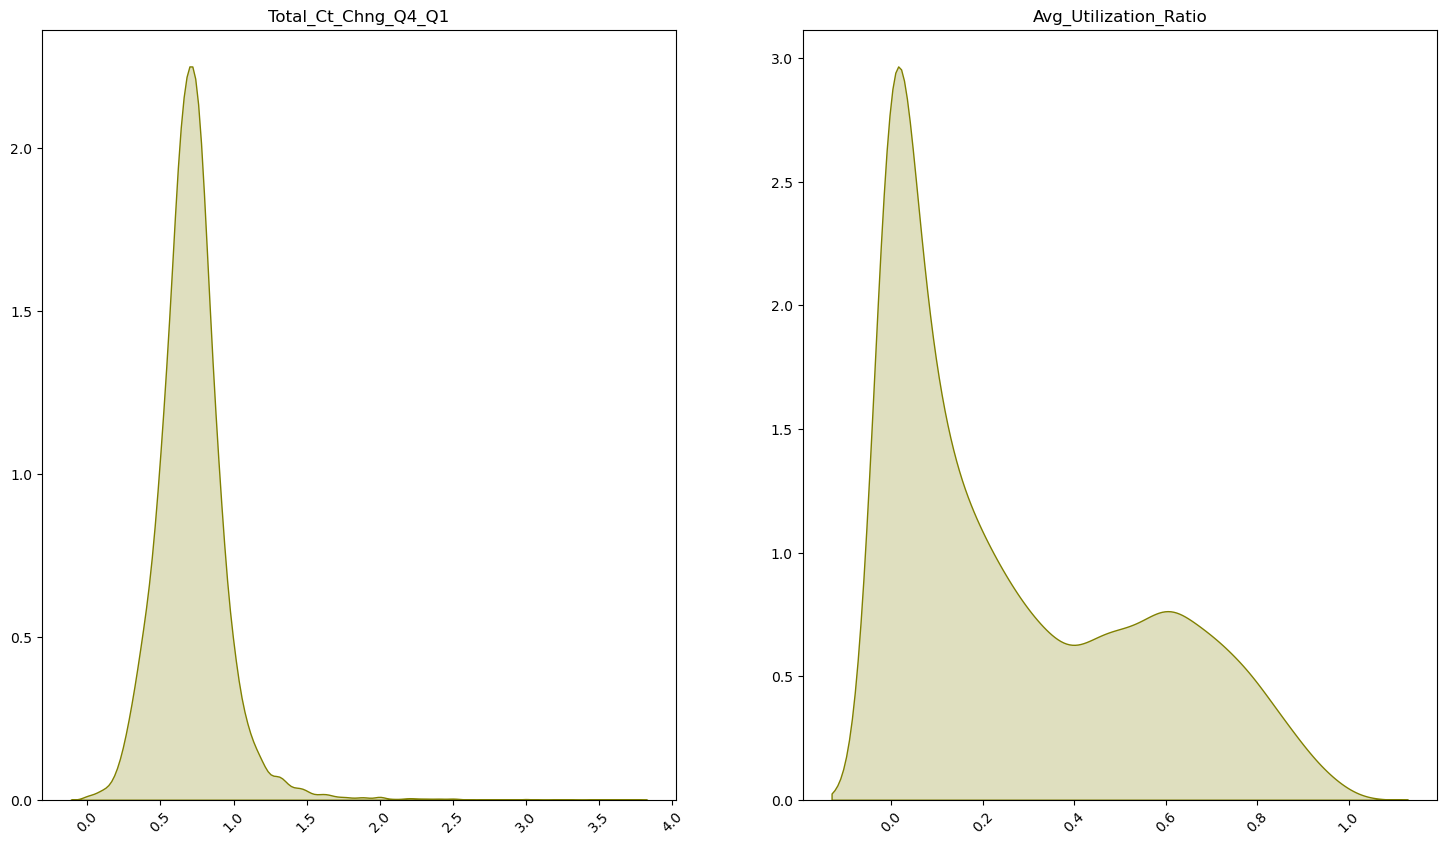

In [18]:
plt.figure(figsize=(18,10))

for num in range(12, 14):
    warnings.filterwarnings(action="ignore")
    plt.subplot(1,2, (num -11) )
    sns.kdeplot(df_row[column_list_continuous[num+1]], shade = True, color= "olive");
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.ylabel("")
    plt.title(column_list_continuous[num+1])

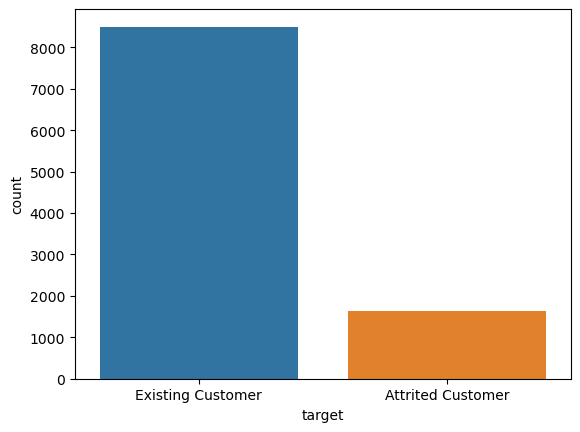

In [19]:
sns.countplot(x=df_row['target'], data = df_row);

In [11]:
x = df_encorder.drop(columns="target")
y = df_encorder[["target"]]

In [12]:
x.shape, y.shape

((10127, 20), (10127, 1))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=13)

In [14]:
y_train.value_counts(), y_test.value_counts()

(target
 1         6799
 0         1302
 dtype: int64,
 target
 1         1701
 0          325
 dtype: int64)

In [24]:
dc_model = DecisionTreeClassifier()

params = {
    "max_depth" : [3, 5, 7, 9, 11],
    'random_state' : [13]
}

dc_grid_model = GridSearchCV(dc_model, param_grid=params, cv = 5, scoring='accuracy')
dc_grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11], 'random_state': [13]},
             scoring='accuracy')

In [25]:
pred = dc_grid_model.predict(x_test)
round(accuracy_score(y_test, pred), 2)

0.94

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       325
           1       0.95      0.97      0.96      1701

    accuracy                           0.94      2026
   macro avg       0.90      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026



In [27]:
accuracy_score(y_test, pred)

0.9378084896347483

In [28]:
#report = classification_report(y_test, pred, output_dict=True)
#pd.DataFrame(report)

pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.844291,0.750769,0.794788,325.000000
1,0.953368,0.973545,0.963351,1701.000000
accuracy,0.937808,0.937808,0.937808,0.937808
macro avg,0.898829,0.862157,0.879070,2026.000000
weighted avg,0.935870,0.937808,0.936311,2026.000000


In [7]:
def print_modeling(x_train, x_test, y_train, y_test):
    dc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xb = XGBClassifier()
    lg = LGBMClassifier()
    
    acc = []
    
    
    #DecisionTreeClassifier
    params = {
        "max_depth" : [3, 5, 7, 9, 11],
        'random_state' : [13]
    }
    dc_grid_model = GridSearchCV(dc, param_grid=params, cv = 5, scoring='accuracy')
    dc_grid_model.fit(x_train, y_train)
    pred = dc_grid_model.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    
    dc_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
        
    # RandomForest
    params = {
        "n_estimators" : [100, 500, 1000, 1500, 2000],
        "max_depth" : [3, 5, 7 ,9],
        "random_state" : [13]
    }
    rf_grid = GridSearchCV(rf, param_grid=params, cv=5, scoring="accuracy")
    rf_grid.fit(x_train, y_train)
    pred = rf_grid.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    rf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
    # xgbcBoost
    params = {
        "n_estimators" : [100, 500, 1000, 1500, 2000],
        "max_depth" : [3, 5, 7 ,9],
        "random_state" : [13]
    }
    xb_grid = GridSearchCV(xb, param_grid=params, cv=5, scoring="accuracy")
    xb_grid.fit(x_train, y_train)
    pred = xb_grid.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    xb_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
    # lgbm
    params = {
        "n_estimators" : [100, 500, 1000, 1500, 2000],
        'application' : ['binary'],
        "max_depth" : [3, 5, 7, 9],
        "random_state" : [13]
    }
    lg_grid = GridSearchCV(lg, param_grid=params, cv=5, scoring="accuracy")
    lg_grid.fit(x_train, y_train)
    pred = lg_grid.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    lg_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
    
    df = pd.DataFrame(data={"accuracy" : acc})
    df.rename(index={0 : "Decision", 1 : 'Randomforest', 2 : "XGBC", 3 : 'LGBMC'}, inplace = True)
    return df, dc_report, rf_report, xb_report, lg_report

In [30]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train, x_test, y_train, y_test)
result

,accuracy
Decision,0.937808
Randomforest,0.948174
XGBC,0.968411
LGBMC,0.968411


In [31]:
xb_confusion

,precision,recall,f1-score,support
0,0.930693,0.867692,0.898089,325.000000
1,0.975044,0.987654,0.981308,1701.000000
accuracy,0.968411,0.968411,0.968411,0.968411
macro avg,0.952868,0.927673,0.939699,2026.000000
weighted avg,0.967929,0.968411,0.967959,2026.000000


In [32]:
lg_confusion

,precision,recall,f1-score,support
0,0.936455,0.861538,0.897436,325.000000
1,0.973943,0.988830,0.981330,1701.000000
accuracy,0.968411,0.968411,0.968411,0.968411
macro avg,0.955199,0.925184,0.939383,2026.000000
weighted avg,0.967930,0.968411,0.967872,2026.000000


# 9일차, 0에 대한 Recall 개선

- STOME_overSampling
- PCA
- Clustering

In [23]:
x_train

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7446,719463708,47,0,1,5,2,1,0,34,5,1,3,2099.0,1164,935.0,0.717,4471,80,0.667,0.555
1121,780025908,40,0,2,4,1,4,3,30,4,2,2,10836.0,1932,8904.0,0.563,1293,31,0.824,0.178
9941,716464533,32,0,1,2,1,4,0,36,4,3,3,9550.0,2517,7033.0,0.713,13783,116,0.841,0.264
9324,708163758,41,1,3,6,1,0,0,33,2,4,3,34516.0,638,33878.0,0.724,13085,139,0.675,0.018
41,758551608,51,1,2,6,1,1,0,44,4,1,0,6205.0,2204,4001.0,0.803,1347,28,0.556,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,714781908,43,1,3,2,2,2,0,35,3,3,2,5652.0,548,5104.0,0.647,3710,70,0.458,0.097
4779,710622333,39,0,2,3,2,1,0,28,3,2,2,2751.0,2258,493.0,0.634,4386,67,0.675,0.821
7659,789121233,53,0,2,6,2,4,0,41,5,1,3,2329.0,2290,39.0,0.533,4609,76,0.767,0.983
1917,719318583,37,1,3,3,1,4,0,26,3,3,4,6866.0,2389,4477.0,0.395,862,13,0.182,0.348


In [16]:
km = KMeans(n_clusters=10, random_state=13)

In [17]:
km_data = km.fit(x_train[['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category']])

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
x_train['clustering'] = km_data.labels_
x_train

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering
7446,719463708,47,0,1,5,2,1,0,34,5,...,3,2099.0,1164,935.0,0.717,4471,80,0.667,0.555,6
1121,780025908,40,0,2,4,1,4,3,30,4,...,2,10836.0,1932,8904.0,0.563,1293,31,0.824,0.178,4
9941,716464533,32,0,1,2,1,4,0,36,4,...,3,9550.0,2517,7033.0,0.713,13783,116,0.841,0.264,9
9324,708163758,41,1,3,6,1,0,0,33,2,...,3,34516.0,638,33878.0,0.724,13085,139,0.675,0.018,5
41,758551608,51,1,2,6,1,1,0,44,4,...,0,6205.0,2204,4001.0,0.803,1347,28,0.556,0.355,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,714781908,43,1,3,2,2,2,0,35,3,...,2,5652.0,548,5104.0,0.647,3710,70,0.458,0.097,2
4779,710622333,39,0,2,3,2,1,0,28,3,...,2,2751.0,2258,493.0,0.634,4386,67,0.675,0.821,4
7659,789121233,53,0,2,6,2,4,0,41,5,...,3,2329.0,2290,39.0,0.533,4609,76,0.767,0.983,8
1917,719318583,37,1,3,3,1,4,0,26,3,...,4,6866.0,2389,4477.0,0.395,862,13,0.182,0.348,1


In [19]:
x_train["clustering"].unique()

array([6, 4, 9, 5, 3, 2, 8, 7, 0, 1])

In [20]:
x_test['clustering'] = km_data.predict(x_test[['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category']])
x_test

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering
6263,714086133,47,0,4,5,2,4,0,36,4,...,3,2577.0,1450,1127.0,0.747,4576,83,0.766,0.563,6
4505,713388108,62,0,0,3,3,4,0,51,4,...,3,5210.0,0,5210.0,0.640,2162,36,0.161,0.000,7
3089,715412583,51,1,3,4,1,1,0,36,6,...,4,7925.0,1445,6480.0,0.750,3815,65,0.806,0.182,8
6715,711237633,49,1,0,2,1,2,0,29,3,...,3,1460.0,0,1460.0,0.738,2329,36,0.500,0.000,0
2849,709206333,44,0,4,2,2,1,0,30,3,...,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,718812708,57,1,2,2,2,0,0,44,5,...,4,34516.0,219,34297.0,0.482,1882,48,0.714,0.006,3
5959,720768258,52,0,3,2,2,4,0,34,5,...,1,2996.0,2147,849.0,0.503,4724,66,0.737,0.717,8
9304,710374008,53,1,1,2,2,3,0,47,1,...,2,34516.0,1583,32933.0,0.631,12906,100,0.639,0.046,8
5062,711445233,42,0,5,5,2,4,0,36,6,...,1,1438.3,0,1438.3,0.813,4653,78,0.950,0.000,5


In [21]:
pca = PCA(n_components=2, random_state=13)

pca_data_train = pca.fit_transform(x_train[['Credit_Limit', "Total_Revolving_Bal",
                                           "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
                                           "Total_Trans_Amt", "Total_Trans_Ct",
                                           "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]])
pca_data_test = pca.transform(x_test[['Credit_Limit', "Total_Revolving_Bal",
                                           "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
                                           "Total_Trans_Amt", "Total_Trans_Ct",
                                           "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]])

x_train["pca1"] = pca_data_train[:, 0]
x_train["pca2"] = pca_data_train[:, 1]

x_test["pca1"] = pca_data_test[:, 0]
x_test["pca2"] = pca_data_test[:, 1]

In [22]:
x_train

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
7446,719463708,47,0,1,5,2,1,0,34,5,...,1164,935.0,0.717,4471,80,0.667,0.555,6,-9205.849143,516.732580
1121,780025908,40,0,2,4,1,4,3,30,4,...,1932,8904.0,0.563,1293,31,0.824,0.178,4,2444.558907,-3193.300883
9941,716464533,32,0,1,2,1,4,0,36,4,...,2517,7033.0,0.713,13783,116,0.841,0.264,9,804.106975,9401.211553
9324,708163758,41,1,3,6,1,0,0,33,2,...,638,33878.0,0.724,13085,139,0.675,0.018,5,37365.109024,6925.362986
41,758551608,51,1,2,6,1,1,0,44,4,...,2204,4001.0,0.803,1347,28,0.556,0.355,6,-4286.771699,-2814.052523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,714781908,43,1,3,2,2,2,0,35,3,...,548,5104.0,0.647,3710,70,0.458,0.097,2,-3787.937955,-517.575080
4779,710622333,39,0,2,3,2,1,0,28,3,...,2258,493.0,0.634,4386,67,0.675,0.821,4,-9060.816805,454.611458
7659,789121233,53,0,2,6,2,4,0,41,5,...,2290,39.0,0.533,4609,76,0.767,0.983,8,-9669.014626,707.439147
1917,719318583,37,1,3,3,1,4,0,26,3,...,2389,4477.0,0.395,862,13,0.182,0.348,1,-3506.438750,-3331.338193


In [23]:
x_test

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
6263,714086133,47,0,4,5,2,4,0,36,4,...,1450,1127.0,0.747,4576,83,0.766,0.563,6,-8727.475697,607.063520
4505,713388108,62,0,0,3,3,4,0,51,4,...,0,5210.0,0.640,2162,36,0.161,0.000,7,-4098.625507,-2067.377731
3089,715412583,51,1,3,4,1,1,0,36,6,...,1445,6480.0,0.750,3815,65,0.806,0.182,8,-1205.038880,-509.962636
6715,711237633,49,1,0,2,1,2,0,29,3,...,0,1460.0,0.738,2329,36,0.500,0.000,0,-9388.149870,-1650.512408
2849,709206333,44,0,4,2,2,1,0,30,3,...,0,4333.0,0.463,1558,40,0.538,0.000,2,-5365.993706,-2612.034610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,718812708,57,1,2,2,2,0,0,44,5,...,219,34297.0,0.482,1882,48,0.714,0.006,3,37132.457155,-4288.126331
5959,720768258,52,0,3,2,2,4,0,34,5,...,2147,849.0,0.503,4724,66,0.737,0.717,8,-8620.451770,769.072055
9304,710374008,53,1,1,2,2,3,0,47,1,...,1583,32933.0,0.631,12906,100,0.639,0.046,8,36689.807806,6803.675297
5062,711445233,42,0,5,5,2,4,0,36,6,...,0,1438.3,0.813,4653,78,0.950,0.000,5,-9309.202607,671.972264


In [100]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train, x_test, y_train, y_test)
result

,accuracy
Decision,0.937808
Randomforest,0.955577
XGBC,0.970385
LGBMC,0.972853


In [101]:
xb_confusion

,precision,recall,f1-score,support
0,0.940199,0.870769,0.904153,325.000000
1,0.975652,0.989418,0.982487,1701.000000
accuracy,0.970385,0.970385,0.970385,0.970385
macro avg,0.957926,0.930094,0.943320,2026.000000
weighted avg,0.969965,0.970385,0.969921,2026.000000


In [102]:
lg_confusion

,precision,recall,f1-score,support
0,0.950000,0.876923,0.912000,325.000000
1,0.976825,0.991182,0.983951,1701.000000
accuracy,0.972853,0.972853,0.972853,0.972853
macro avg,0.963413,0.934052,0.947975,2026.000000
weighted avg,0.972522,0.972853,0.972409,2026.000000


In [24]:
smote = SMOTE(random_state=13)

In [25]:
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

In [26]:
y_train_over.value_counts()

target
0         6799
1         6799
dtype: int64

In [35]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train_over, x_test, y_train_over, y_test)
result

,accuracy
Decision,0.909181
Randomforest,0.934353
XGBC,0.957552
LGBMC,0.963968


In [36]:
xb_confusion

,precision,recall,f1-score,support
0,0.869969,0.864615,0.867284,325.000000
1,0.974163,0.975309,0.974736,1701.000000
accuracy,0.957552,0.957552,0.957552,0.957552
macro avg,0.922066,0.919962,0.921010,2026.000000
weighted avg,0.957449,0.957552,0.957499,2026.000000


In [37]:
lg_confusion

,precision,recall,f1-score,support
0,0.893750,0.880000,0.886822,325.000000
1,0.977140,0.980012,0.978574,1701.000000
accuracy,0.963968,0.963968,0.963968,0.963968
macro avg,0.935445,0.930006,0.932698,2026.000000
weighted avg,0.963763,0.963968,0.963855,2026.000000


## 10일차, OverSampling데이터 성능 개선 시도

In [27]:
x_train_over

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
0,719463708,47,0,1,5,2,1,0,34,5,...,1164,935.000000,0.717000,4471,80,0.667000,0.555000,6,-9205.849143,516.732580
1,780025908,40,0,2,4,1,4,3,30,4,...,1932,8904.000000,0.563000,1293,31,0.824000,0.178000,4,2444.558907,-3193.300883
2,716464533,32,0,1,2,1,4,0,36,4,...,2517,7033.000000,0.713000,13783,116,0.841000,0.264000,9,804.106975,9401.211553
3,708163758,41,1,3,6,1,0,0,33,2,...,638,33878.000000,0.724000,13085,139,0.675000,0.018000,5,37365.109024,6925.362986
4,758551608,51,1,2,6,1,1,0,44,4,...,2204,4001.000000,0.803000,1347,28,0.556000,0.355000,6,-4286.771699,-2814.052523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13593,719630233,50,0,3,3,1,4,0,36,1,...,210,6998.701035,0.794549,3308,50,0.500940,0.006151,0,-1368.638676,-1042.704764
13594,709585489,36,0,2,2,1,2,0,26,3,...,0,4386.849260,0.648927,4177,48,0.646998,0.000000,6,-5166.412557,-0.119352
13595,708794042,54,0,2,3,2,4,0,40,4,...,0,4046.984520,0.795657,2210,40,0.514163,0.000000,6,-5739.240418,-1940.944219
13596,718966824,45,0,4,3,2,3,0,37,5,...,803,1616.115883,0.751711,3320,51,0.529114,0.339350,2,-8552.557766,-675.357234


In [29]:
y_train_over.value_counts()

target
0         6799
1         6799
dtype: int64

In [32]:
x_train_over_drop = x_train_over.drop(columns=['CLIENTNUM', 'Gender'])
x_train_over_drop

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
0,47,1,5,2,1,0,34,5,1,3,...,1164,935.000000,0.717000,4471,80,0.667000,0.555000,6,-9205.849143,516.732580
1,40,2,4,1,4,3,30,4,2,2,...,1932,8904.000000,0.563000,1293,31,0.824000,0.178000,4,2444.558907,-3193.300883
2,32,1,2,1,4,0,36,4,3,3,...,2517,7033.000000,0.713000,13783,116,0.841000,0.264000,9,804.106975,9401.211553
3,41,3,6,1,0,0,33,2,4,3,...,638,33878.000000,0.724000,13085,139,0.675000,0.018000,5,37365.109024,6925.362986
4,51,2,6,1,1,0,44,4,1,0,...,2204,4001.000000,0.803000,1347,28,0.556000,0.355000,6,-4286.771699,-2814.052523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13593,50,3,3,1,4,0,36,1,2,2,...,210,6998.701035,0.794549,3308,50,0.500940,0.006151,0,-1368.638676,-1042.704764
13594,36,2,2,1,2,0,26,3,3,4,...,0,4386.849260,0.648927,4177,48,0.646998,0.000000,6,-5166.412557,-0.119352
13595,54,2,3,2,4,0,40,4,2,2,...,0,4046.984520,0.795657,2210,40,0.514163,0.000000,6,-5739.240418,-1940.944219
13596,45,4,3,2,3,0,37,5,3,2,...,803,1616.115883,0.751711,3320,51,0.529114,0.339350,2,-8552.557766,-675.357234


In [35]:
x_test_drop = x_test.drop(columns=['CLIENTNUM', 'Gender'])
x_test_drop

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
6263,47,4,5,2,4,0,36,4,2,3,...,1450,1127.0,0.747,4576,83,0.766,0.563,6,-8727.475697,607.063520
4505,62,0,3,3,4,0,51,4,2,3,...,0,5210.0,0.640,2162,36,0.161,0.000,7,-4098.625507,-2067.377731
3089,51,3,4,1,1,0,36,6,1,4,...,1445,6480.0,0.750,3815,65,0.806,0.182,8,-1205.038880,-509.962636
6715,49,0,2,1,2,0,29,3,3,3,...,0,1460.0,0.738,2329,36,0.500,0.000,0,-9388.149870,-1650.512408
2849,44,4,2,2,1,0,30,3,4,4,...,0,4333.0,0.463,1558,40,0.538,0.000,2,-5365.993706,-2612.034610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,57,2,2,2,0,0,44,5,3,4,...,219,34297.0,0.482,1882,48,0.714,0.006,3,37132.457155,-4288.126331
5959,52,3,2,2,4,0,34,5,2,1,...,2147,849.0,0.503,4724,66,0.737,0.717,8,-8620.451770,769.072055
9304,53,1,2,2,3,0,47,1,1,2,...,1583,32933.0,0.631,12906,100,0.639,0.046,8,36689.807806,6803.675297
5062,42,5,5,2,4,0,36,6,3,1,...,0,1438.3,0.813,4653,78,0.950,0.000,5,-9309.202607,671.972264


In [ ]:
y_test.values.reshape(-1,)

In [43]:
y_train_over.values.reshape(-1,)

(13598,)

In [37]:
x_train_over_drop.shape, x_test_drop.shape, y_train_over.shape, y_test.shape

((13598, 21), (2026, 21), (13598, 1), (2026, 1))

In [44]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train_over_drop, x_test_drop, y_train_over.values.reshape(-1,), y_test.values.reshape(-1,))
result

,accuracy
Decision,0.911155
Randomforest,0.935341
XGBC,0.952122
LGBMC,0.960513


In [45]:
xb_confusion

,precision,recall,f1-score,support
0,0.845455,0.858462,0.851908,325.000000
1,0.972877,0.970018,0.971445,1701.000000
accuracy,0.952122,0.952122,0.952122,0.952122
macro avg,0.909166,0.914240,0.911677,2026.000000
weighted avg,0.952437,0.952122,0.952270,2026.000000


In [46]:
lg_confusion

,precision,recall,f1-score,support
0,0.876923,0.876923,0.876923,325.000000
1,0.976484,0.976484,0.976484,1701.000000
accuracy,0.960513,0.960513,0.960513,0.960513
macro avg,0.926704,0.926704,0.926704,2026.000000
weighted avg,0.960513,0.960513,0.960513,2026.000000


In [47]:
x_train_over_drop

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
0,47,1,5,2,1,0,34,5,1,3,...,1164,935.000000,0.717000,4471,80,0.667000,0.555000,6,-9205.849143,516.732580
1,40,2,4,1,4,3,30,4,2,2,...,1932,8904.000000,0.563000,1293,31,0.824000,0.178000,4,2444.558907,-3193.300883
2,32,1,2,1,4,0,36,4,3,3,...,2517,7033.000000,0.713000,13783,116,0.841000,0.264000,9,804.106975,9401.211553
3,41,3,6,1,0,0,33,2,4,3,...,638,33878.000000,0.724000,13085,139,0.675000,0.018000,5,37365.109024,6925.362986
4,51,2,6,1,1,0,44,4,1,0,...,2204,4001.000000,0.803000,1347,28,0.556000,0.355000,6,-4286.771699,-2814.052523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13593,50,3,3,1,4,0,36,1,2,2,...,210,6998.701035,0.794549,3308,50,0.500940,0.006151,0,-1368.638676,-1042.704764
13594,36,2,2,1,2,0,26,3,3,4,...,0,4386.849260,0.648927,4177,48,0.646998,0.000000,6,-5166.412557,-0.119352
13595,54,2,3,2,4,0,40,4,2,2,...,0,4046.984520,0.795657,2210,40,0.514163,0.000000,6,-5739.240418,-1940.944219
13596,45,4,3,2,3,0,37,5,3,2,...,803,1616.115883,0.751711,3320,51,0.529114,0.339350,2,-8552.557766,-675.357234


In [2]:
url = "https://raw.githubusercontent.com/DataResolvere/Project/main/first_project/BankChurners.csv"
sd = StandardScaler()

df_row = pd.read_csv(url)
df_row["target"] = df_row["Attrition_Flag"]
df_row = df_row.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", \
                              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",\
                              "Attrition_Flag"])

make_en = LabelEncoder()
df_encorder = df_row.copy()

df_encorder["Gender"] = make_en.fit_transform(df_encorder["Gender"])
df_encorder["Education_Level"] = make_en.fit_transform(df_encorder["Education_Level"])
df_encorder["Marital_Status"] = make_en.fit_transform(df_encorder["Marital_Status"])
df_encorder["Income_Category"] = make_en.fit_transform(df_encorder["Income_Category"])
df_encorder["Card_Category"] = make_en.fit_transform(df_encorder["Card_Category"])
df_encorder["target"] = make_en.fit_transform(df_encorder["target"])

df_encorder['Months_on_book'] = sd.fit_transform(df_encorder[['Months_on_book']])
df_encorder['Total_Relationship_Count'] = sd.fit_transform(df_encorder[['Total_Relationship_Count']])
df_encorder['Months_Inactive_12_mon'] = sd.fit_transform(df_encorder[['Months_Inactive_12_mon']])
df_encorder['Contacts_Count_12_mon'] = sd.fit_transform(df_encorder[['Contacts_Count_12_mon']])
df_encorder['Credit_Limit'] = sd.fit_transform(df_encorder[['Credit_Limit']])
df_encorder['Total_Revolving_Bal'] = sd.fit_transform(df_encorder[['Total_Revolving_Bal']])
df_encorder['Avg_Open_To_Buy'] = sd.fit_transform(df_encorder[['Avg_Open_To_Buy']])
df_encorder['Total_Amt_Chng_Q4_Q1'] = sd.fit_transform(df_encorder[['Total_Amt_Chng_Q4_Q1']])
df_encorder['Total_Trans_Amt'] = sd.fit_transform(df_encorder[['Total_Trans_Amt']])
df_encorder['Total_Trans_Ct'] = sd.fit_transform(df_encorder[['Total_Trans_Ct']])
df_encorder['Total_Ct_Chng_Q4_Q1'] = sd.fit_transform(df_encorder[['Total_Ct_Chng_Q4_Q1']])
df_encorder['Avg_Utilization_Ratio'] = sd.fit_transform(df_encorder[['Avg_Utilization_Ratio']])



x = df_encorder.drop(columns="target")
y = df_encorder[["target"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=13)

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8101, 20), (2026, 20), (8101, 1), (2026, 1))

In [4]:
# Clustering
km = KMeans(n_clusters=10, random_state=13)
km_data = km.fit(x_train[['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category']])
x_train['clustering'] = km_data.labels_
x_test['clustering'] = km_data.predict(x_test[['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category']])

#PCA
pca = PCA(n_components=2, random_state=13)

pca_data_train = pca.fit_transform(x_train[['Credit_Limit', "Total_Revolving_Bal",
                                           "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
                                           "Total_Trans_Amt", "Total_Trans_Ct",
                                           "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]])
pca_data_test = pca.transform(x_test[['Credit_Limit', "Total_Revolving_Bal",
                                           "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
                                           "Total_Trans_Amt", "Total_Trans_Ct",
                                           "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]])

x_train["pca1"] = pca_data_train[:, 0]
x_train["pca2"] = pca_data_train[:, 1]

x_test["pca1"] = pca_data_test[:, 0]
x_test["pca2"] = pca_data_test[:, 1]

#OverSampling
smote = SMOTE(random_state=13)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print(y_train_over.value_counts())

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


target
0         6799
1         6799
dtype: int64


In [5]:
x_train_over.shape, y_train_over.shape, x_test.shape, y_test.shape

((13598, 23), (13598, 1), (2026, 23), (2026, 1))

In [87]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train_over, x_test, y_train_over.values.ravel(), y_test.values.ravel())
result

,accuracy
Decision,0.923495
Randomforest,0.938302
XGBC,0.962488
LGBMC,0.961994


In [88]:
xb_confusion

,precision,recall,f1-score,support
0,0.895238,0.867692,0.881250,325.000000
1,0.974868,0.980600,0.977726,1701.000000
accuracy,0.962488,0.962488,0.962488,0.962488
macro avg,0.935053,0.924146,0.929488,2026.000000
weighted avg,0.962095,0.962488,0.962250,2026.000000


In [89]:
lg_confusion

,precision,recall,f1-score,support
0,0.897436,0.861538,0.879121,325.000000
1,0.973746,0.981188,0.977452,1701.000000
accuracy,0.961994,0.961994,0.961994,0.961994
macro avg,0.935591,0.921363,0.928287,2026.000000
weighted avg,0.961504,0.961994,0.961679,2026.000000


In [7]:
x_train_over

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
0,719463708,47,0,1,5,2,1,0,-0.241473,0.763943,...,0.001455,-0.718809,-0.195901,0.019698,0.645096,-0.189951,1.016064,6,-1.191886,0.638832
1,780025908,40,0,2,4,1,4,3,-0.742348,0.120579,...,0.943848,0.157846,-0.898469,-0.915844,-1.442550,0.469507,-0.351474,4,-0.221841,-1.233698
2,716464533,32,0,1,2,1,4,0,0.008965,0.120579,...,1.661686,-0.047979,-0.214149,2.760971,2.178876,0.540914,-0.039516,9,0.747612,3.566699
3,708163758,41,1,3,6,1,0,0,-0.366692,-1.166148,...,-0.643985,2.905190,-0.163966,2.555494,3.158792,-0.156348,-0.931861,5,4.987742,2.642040
4,758551608,51,1,2,6,1,1,0,1.010715,0.120579,...,1.277612,-0.381524,0.196442,-0.899947,-1.570365,-0.656192,0.290580,6,-1.196521,-1.092403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13593,719654238,45,0,2,2,1,1,0,0.465401,-1.166148,...,1.490225,0.287632,0.656671,-0.401873,-0.218900,-0.120844,-0.146478,2,0.077972,0.155041
13594,709636793,42,0,3,3,2,1,0,-0.271187,-0.878269,...,0.112219,-0.291422,0.960622,1.132604,0.071158,-0.041880,-0.413905,2,0.110677,0.836116
13595,708800356,47,0,3,4,1,4,0,-0.370815,0.141763,...,-1.426858,-0.560443,1.273927,-0.502019,-1.101710,-0.983952,-0.997155,4,-0.287566,-1.659963
13596,718966824,45,0,4,3,2,3,0,0.259143,1.085292,...,-0.440501,-0.643880,-0.037544,-0.318921,-0.568817,-0.769124,0.233811,2,-0.949602,-0.778428


In [9]:
from catboost import CatBoostClassifier, Pool

cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat.fit(x_train_over, y_train_over,
eval_set=[(x_train_over, y_train_over), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["Gender","Education_Level","Marital_Status","Income_Category", "Card_Category"],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0.9610069101678184


In [10]:
cat_report

,precision,recall,f1-score,support
0,0.896774,0.855385,0.875591,325.000000
1,0.972611,0.981188,0.976880,1701.000000
accuracy,0.961007,0.961007,0.961007,0.961007
macro avg,0.934692,0.918286,0.926235,2026.000000
weighted avg,0.960445,0.961007,0.960632,2026.000000


In [15]:
for result in zip(cat.feature_importances_, x_train_over.columns):
    print(result)


(1.5986416330693587, 'CLIENTNUM')
(1.7205745876016187, 'Customer_Age')
(4.059676091828785, 'Gender')
(0.8801732775403318, 'Dependent_count')
(1.4684673372584038, 'Education_Level')
(1.8071460560320436, 'Marital_Status')
(3.945901846532543, 'Income_Category')
(0.46721440182803636, 'Card_Category')
(1.6373047917228996, 'Months_on_book')
(11.623325323235465, 'Total_Relationship_Count')
(9.149718435363537, 'Months_Inactive_12_mon')
(8.53969204424009, 'Contacts_Count_12_mon')
(1.6442683224486263, 'Credit_Limit')
(4.902552643603821, 'Total_Revolving_Bal')
(1.0232093804618496, 'Avg_Open_To_Buy')
(4.249130163389931, 'Total_Amt_Chng_Q4_Q1')
(13.783340715154713, 'Total_Trans_Amt')
(17.925621149109368, 'Total_Trans_Ct')
(4.2345940686919725, 'Total_Ct_Chng_Q4_Q1')
(0.7306332858039334, 'Avg_Utilization_Ratio')
(1.1094291785098636, 'clustering')
(0.9628502922836774, 'pca1')
(2.53653497428911, 'pca2')


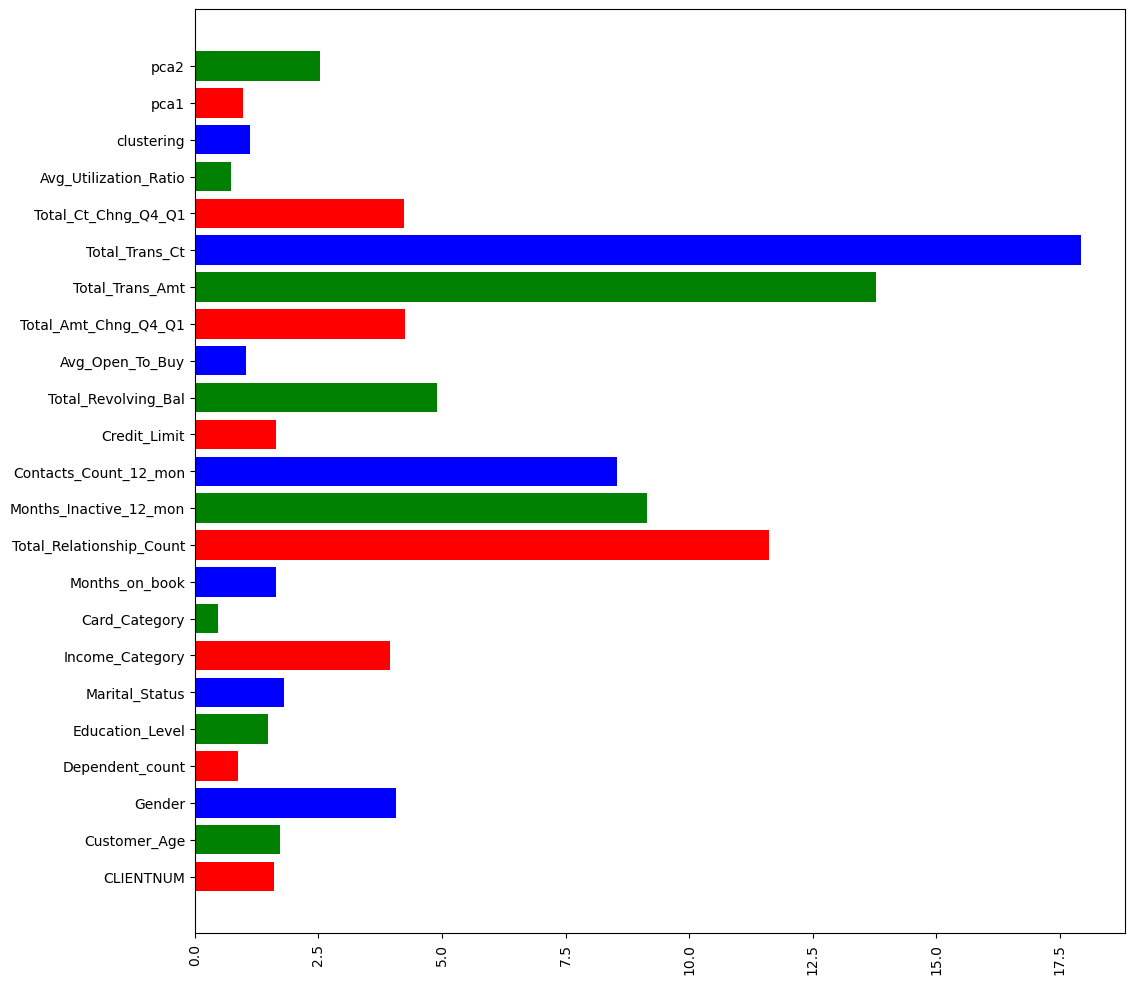

In [28]:
plt.figure(figsize=(12, 12))
plt.barh(x_train_over.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

In [6]:
x_train_over.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'clustering', 'pca1', 'pca2'],
      dtype='object')

In [7]:
x_train_over_drop = x_train_over[['Total_Trans_Ct','Total_Trans_Amt','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Relationship_Count']]
x_test_drop = x_test[['Total_Trans_Ct','Total_Trans_Amt','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Relationship_Count']]

In [8]:
x_train_over_drop.shape, y_train_over.shape, x_test_drop.shape, y_test.shape

((13598, 5), (13598, 1), (2026, 5), (2026, 1))

In [11]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train_over_drop, x_test_drop, y_train_over.values.ravel(), y_test.values.ravel())
result

,accuracy
Decision,0.898815
Randomforest,0.915104
XGBC,0.922014
LGBMC,0.924975


In [12]:
xb_confusion

,precision,recall,f1-score,support
0,0.755352,0.760000,0.757669,325.000000
1,0.954091,0.952969,0.953529,1701.000000
accuracy,0.922014,0.922014,0.922014,0.922014
macro avg,0.854721,0.856484,0.855599,2026.000000
weighted avg,0.922210,0.922014,0.922110,2026.000000


In [13]:
lg_confusion

,precision,recall,f1-score,support
0,0.764526,0.769231,0.766871,325.000000
1,0.955856,0.954733,0.955294,1701.000000
accuracy,0.924975,0.924975,0.924975,0.924975
macro avg,0.860191,0.861982,0.861083,2026.000000
weighted avg,0.925164,0.924975,0.925068,2026.000000


In [5]:
x_train_over

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,clustering,pca1,pca2
0,719463708,47,0,1,5,2,1,0,-0.241473,0.763943,...,0.001455,-0.718809,-0.195901,0.019698,0.645096,-0.189951,1.016064,6,-1.191886,0.638832
1,780025908,40,0,2,4,1,4,3,-0.742348,0.120579,...,0.943848,0.157846,-0.898469,-0.915844,-1.442550,0.469507,-0.351474,4,-0.221841,-1.233698
2,716464533,32,0,1,2,1,4,0,0.008965,0.120579,...,1.661686,-0.047979,-0.214149,2.760971,2.178876,0.540914,-0.039516,9,0.747612,3.566699
3,708163758,41,1,3,6,1,0,0,-0.366692,-1.166148,...,-0.643985,2.905190,-0.163966,2.555494,3.158792,-0.156348,-0.931861,5,4.987742,2.642040
4,758551608,51,1,2,6,1,1,0,1.010715,0.120579,...,1.277612,-0.381524,0.196442,-0.899947,-1.570365,-0.656192,0.290580,6,-1.196521,-1.092403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13593,719654238,45,0,2,2,1,1,0,0.465401,-1.166148,...,1.490225,0.287632,0.656671,-0.401873,-0.218900,-0.120844,-0.146478,2,0.077972,0.155041
13594,709636793,42,0,3,3,2,1,0,-0.271187,-0.878269,...,0.112219,-0.291422,0.960622,1.132604,0.071158,-0.041880,-0.413905,2,0.110677,0.836116
13595,708800356,47,0,3,4,1,4,0,-0.370815,0.141763,...,-1.426858,-0.560443,1.273927,-0.502019,-1.101710,-0.983952,-0.997155,4,-0.287566,-1.659963
13596,718966824,45,0,4,3,2,3,0,0.259143,1.085292,...,-0.440501,-0.643880,-0.037544,-0.318921,-0.568817,-0.769124,0.233811,2,-0.949602,-0.778428


In [8]:
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train_over.drop(columns=["CLIENTNUM"]), x_test.drop(columns=["CLIENTNUM"]), y_train_over.values.ravel(), y_test.values.ravel())
result

,accuracy
Decision,0.923495
Randomforest,0.936328
XGBC,0.961007
LGBMC,0.962981


In [9]:
xb_confusion

,precision,recall,f1-score,support
0,0.879630,0.876923,0.878274,325.000000
1,0.976498,0.977072,0.976785,1701.000000
accuracy,0.961007,0.961007,0.961007,0.961007
macro avg,0.928064,0.926998,0.927530,2026.000000
weighted avg,0.960959,0.961007,0.960983,2026.000000


In [10]:
lg_confusion

,precision,recall,f1-score,support
0,0.895570,0.870769,0.882995,325.000000
1,0.975439,0.980600,0.978012,1701.000000
accuracy,0.962981,0.962981,0.962981,0.962981
macro avg,0.935504,0.925684,0.930504,2026.000000
weighted avg,0.962626,0.962981,0.962770,2026.000000
